# Red Wine Quality Prediction

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the csv file
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset has 1599 rows and 12 columns

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# About the Columns

1.	fixed acidity - most acids involved with wine or fixed or non-volatile (do not evaporate readily)
2.	volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3.	citric acid - found in small quantities, citric acid can add 'freshness' and flavour to wines
4.	residual sugar - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/litre and wines with greater than 45 grams/litre are considered sweet
5.	chlorides - the amount of salt in the wine
6.	free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7.	total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8.	density - the density of water is close to that of water depending on the percent alcohol and sugar content
9.	pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10.	sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11.	alcohol - the percent alcohol content of the wine
12.	quality - output variable (based on sensory data, score between 0 and 10)



# EDA

In [4]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As seen above, there are no null values present in any of the columns in this dataset

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.dtypes
#Checking the data types of the columns in the dataset

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

As seen above, all the columns except for quality are float datatype, while quality is of integer datatype.

# Visualizing the quality column  

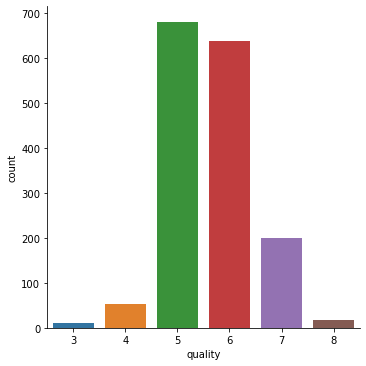

In [8]:
sb.catplot(x="quality", data = df, kind = "count")

The above graph shows that many of the wines recorded in this dataset were of quality 5 and 6, with 3 being classified as the worst wine and 8 being classified as the best wine that was produced.

# Barplot

## Fixed Acidity vs Quality

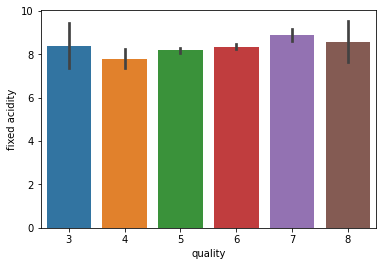

<Figure size 360x360 with 0 Axes>

In [10]:
sb.barplot(x = 'quality', y ='fixed acidity', data = df)
fig = plt.figure(figsize=(5,5))

## Volatile Acidity vs Quality

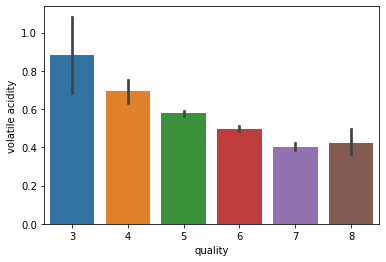

<Figure size 360x360 with 0 Axes>

In [11]:
sb.barplot(x = 'quality', y ='volatile acidity', data = df)
fig = plt.figure(figsize=(5,5))

## Citric Acid vs Quality

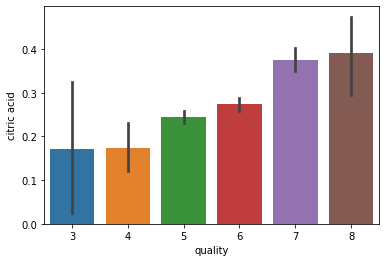

<Figure size 360x360 with 0 Axes>

In [21]:
sb.barplot(x = 'quality', y ='citric acid', data = df)
fig = plt.figure(figsize=(5,5))

## Residual Sugar vs Quality

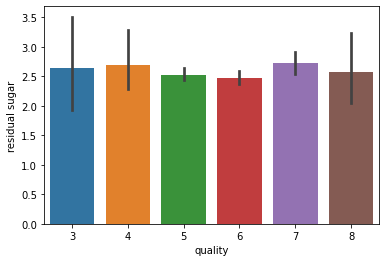

<Figure size 360x360 with 0 Axes>

In [13]:
sb.barplot(x = 'quality', y ='residual sugar', data = df)
fig = plt.figure(figsize=(5,5))

## Chlorides vs Quality

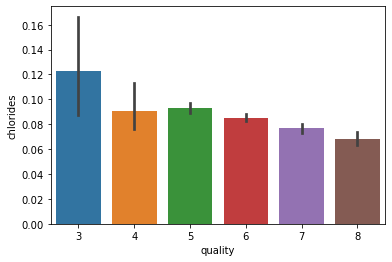

<Figure size 360x360 with 0 Axes>

In [14]:
sb.barplot(x = 'quality', y ='chlorides', data = df)
fig = plt.figure(figsize=(5,5))

## Free Sulphur Dioxide vs Quality

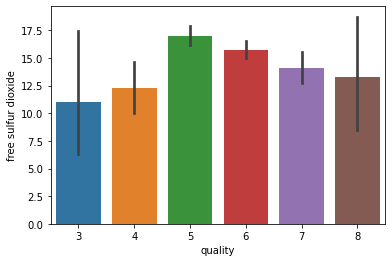

<Figure size 360x360 with 0 Axes>

In [15]:
sb.barplot(x = 'quality', y ='free sulfur dioxide', data = df)
fig = plt.figure(figsize=(5,5))

## Total Sulphur Dioxide vs Quality

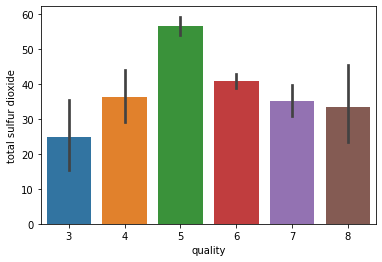

<Figure size 360x360 with 0 Axes>

In [16]:
sb.barplot(x = 'quality', y ='total sulfur dioxide', data = df)
fig = plt.figure(figsize=(5,5))

## Density vs Quality

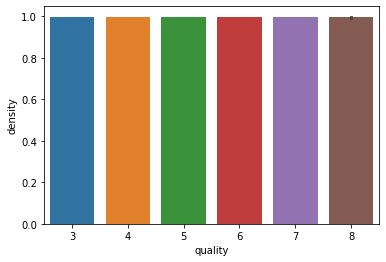

<Figure size 360x360 with 0 Axes>

In [17]:
sb.barplot(x = 'quality', y ='density', data = df)
fig = plt.figure(figsize=(5,5))

## pH vs Quality

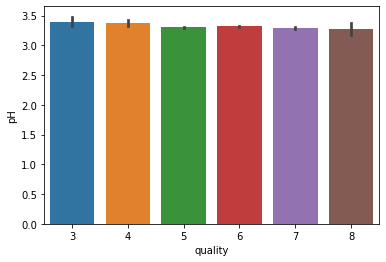

<Figure size 360x360 with 0 Axes>

In [18]:
sb.barplot(x = 'quality', y ='pH', data = df)
fig = plt.figure(figsize=(5,5))

## Sulphates vs Quality

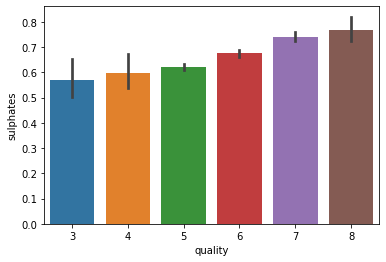

<Figure size 360x360 with 0 Axes>

In [19]:
sb.barplot(x = 'quality', y ='sulphates', data = df)
fig = plt.figure(figsize=(5,5))

## Alcohol vs Quality

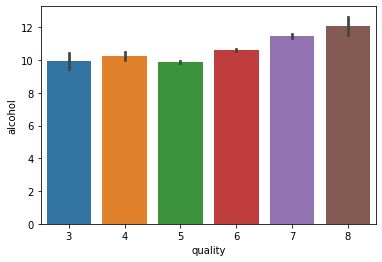

<Figure size 360x360 with 0 Axes>

In [20]:
sb.barplot(x = 'quality', y ='alcohol', data = df)
fig = plt.figure(figsize=(5,5))

# Correlation

In [23]:
dfcorr = df.corr()
#Checking the correlation between the columns present in the dataset

<AxesSubplot:>

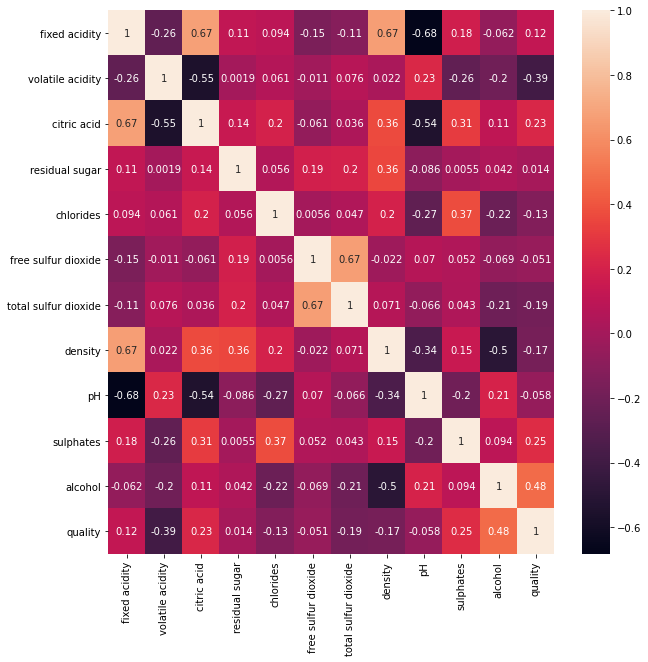

In [24]:
plt.figure(figsize = (10,10))
sb.heatmap(dfcorr, annot = True)

There are two types of correlation:

1. Positive Correlation - The columns that are lighter in color show that the respective column with respect to quality column are directly proportional to the quality column and are said to have positive correlation with quality.
2. Negative Correlation- The columns that are darker in color show that the respective column with respect to quality column are inversely proportional to the quality column and are said to have negative correlation with quality.

The above heatmap that represents the correlation of all the columns with quality, there are some columns that are postively correlated, while the others are negatively correlated. 

As depicted by the heatmap, columns such as volatile acidty are negatively correlated with quality, thereby suggesting that the best quality wine has less volatile acidity. Similarly, columns like alcohol are positively correlated to quality, hence depicting that the best quality wine is more likely to have higher alcohol content.  

# Data Preprocessing

In [25]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [26]:
X = df.drop('quality', axis = 1)

In [27]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [29]:
Y = df['quality']

In [30]:
print(Y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

## MultinomialNB Classification

In [34]:
mnb=MultinomialNB()
mnb.fit(X_train,Y_train)
predmnb=mnb.predict(X_test)

In [35]:
mnb.score(X_train,Y_train)

0.44487881157154024

In [36]:
print(accuracy_score(Y_test,predmnb))

0.440625


In [37]:
print(confusion_matrix(Y_test,predmnb))

[[ 0  0  0  1  1  0]
 [ 0  0  3  5  4  0]
 [ 0  0 70 41 27  0]
 [ 1  0 35 57 38  0]
 [ 0  0  7 15 14  0]
 [ 0  0  0  0  1  0]]


In [38]:
print(classification_report(Y_test,predmnb))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.61      0.51      0.55       138
           6       0.48      0.44      0.46       131
           7       0.16      0.39      0.23        36
           8       0.00      0.00      0.00         1

    accuracy                           0.44       320
   macro avg       0.21      0.22      0.21       320
weighted avg       0.48      0.44      0.45       320



From the above accuracy score, confusion matrix and classification report, we see that MultinomialNB is not the best model to predict the best wine

## Support Vector Classifier

In [39]:
svc = SVC(kernel='rbf')
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)

In [40]:
svc.score(X_train,Y_train)

0.5074276778733385

In [41]:
print(accuracy_score(Y_test,predsvc))

0.5125


In [42]:
print(confusion_matrix(Y_test,predsvc))

[[  0   0   0   2   0   0]
 [  0   0   2  10   0   0]
 [  0   0  63  75   0   0]
 [  0   0  30 101   0   0]
 [  0   0   5  31   0   0]
 [  0   0   0   1   0   0]]


In [43]:
print(classification_report(Y_test,predsvc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.63      0.46      0.53       138
           6       0.46      0.77      0.58       131
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00         1

    accuracy                           0.51       320
   macro avg       0.18      0.20      0.18       320
weighted avg       0.46      0.51      0.46       320



As seen above, Support Vector Classifier is better than MultinomialNB, but still cannot be considered best fit to predict

## Random Forest Classifier

In [44]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
predrfc=rfc.predict(X_test)

In [45]:
rfc.score(X_train,Y_train)

1.0

In [46]:
print(accuracy_score(Y_test,predrfc))

0.73125


In [47]:
print(confusion_matrix(Y_test,predrfc))

[[  0   0   2   0   0   0]
 [  0   0   9   3   0   0]
 [  0   0 118  20   0   0]
 [  0   0  27  99   5   0]
 [  0   0   1  17  17   1]
 [  0   0   0   1   0   0]]


In [48]:
print(classification_report(Y_test,predrfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.75      0.86      0.80       138
           6       0.71      0.76      0.73       131
           7       0.77      0.47      0.59        36
           8       0.00      0.00      0.00         1

    accuracy                           0.73       320
   macro avg       0.37      0.35      0.35       320
weighted avg       0.70      0.73      0.71       320



Comparing the three classification models used in this classification, it is safe to say that Random Forest Classifier is the best model to predict the best wine.

## Predictive System

In [49]:
l1 = (7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1)
l1_numpyarray = np.asarray(l1)
l1reshaped = l1_numpyarray.reshape(1,-1)
l1pred = rfc.predict(l1reshaped)
print(l1pred)

[5]
